# Séries temporelles 

# Prétraitements

# Modèle ARIMA 

In [3]:
# Importation des bibliothèques 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
# similaire à la précédente import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters() 


In [4]:
# importer (charger) notre base de données 
df = pd.read_csv(r'G:\series temporelles\passangers.csv',
                parse_dates=['Month'],
                index_col= ['Month'])

FileNotFoundError: [Errno 2] No such file or directory: 'G:\\series temporelles\\passangers.csv'

In [ ]:
# afficher l'entête de notre dataframe
df.head(-5)

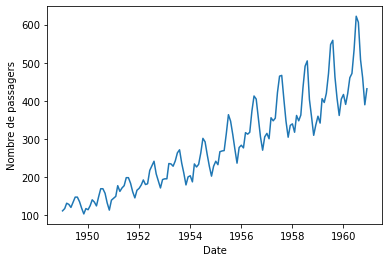

In [ ]:
# Visualiser notre série 
plt.xlabel('Date')
plt.ylabel('Nombre de passagers')
plt.plot(df)
plt.show()

### Statistiques roulantes 

In [ ]:
# calculer la moyenne roulante pour notre df
rolling_mean = df.rolling(window = 12).mean()
# calculer l'Ecart-type roulant pour notre df
rolling_std = df.rolling(window = 12).std()

# Visulaiser les statistiques mobiles
plt.plot(df, color='blue', label= 'Origine')
plt.plot(rolling_mean, color='red', label ='Moyenne mobile')
plt.plot(rolling_std, color='black', label ='Ecart-type mobile')

plt.legend(loc='best')
plt.title('Statistiques roulantes')
plt.show()



NameError: name 'df' is not defined

# ADF

In [ ]:
result = adfuller(df['#Passengers'])
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : 0.8153688792060423
p-value : 0.9918802434376409
Valeurs Critiques :
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


#### Logarithme de la variable dépendante 

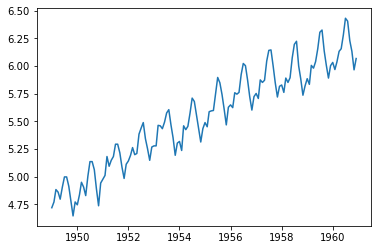

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


In [ ]:
df_log = np.log(df)
plt.plot(df_log)
plt.show()
df_log.head(5)

In [ ]:
#Fonction permettant d'éxécuter les deux test
def get_stationarity(timeseries):
    
    #Statistiques mobiles 
    # calculer la moyenne roulante pour notre df
    rolling_mean = timeseries.rolling(window = 12).mean()
    # calculer l'Ecart-type roulant pour notre df
    rolling_std = timeseries.rolling(window = 12).std()

    # Visulaiser les statistiques mobiles
    plt.plot(timeseries, color='blue', label= 'Origine')
    plt.plot(rolling_mean, color='red', label ='Moyenne mobile')
    plt.plot(rolling_std, color='black', label ='Ecart-type mobile')

    plt.legend(loc='best')
    plt.title('Statistiques roulantes')
    plt.show(block= False)
    
    # Test Dickey-Fuller
    result = adfuller(timeseries['#Passengers'])
    print('Statistiques ADF : {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    print('Valeurs Critiques :')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
    

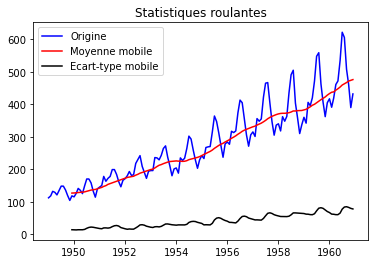

Statistiques ADF : 0.8153688792060423
p-value : 0.9918802434376409
Valeurs Critiques :
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


In [ ]:
# Appeler la procédure  
get_stationarity(df)

## Transformations des séries temporelles 
 non stationnaire ==> stationnaire 

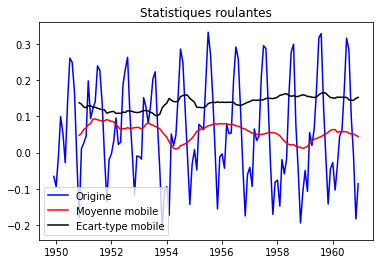

Statistiques ADF : -3.162907991300871
p-value : 0.022234630001243004
Valeurs Critiques :
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


In [ ]:
# Soustraire la moyenne mobile
rolling_mean = df_log.rolling(window = 12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace = True)
get_stationarity(df_log_minus_mean)

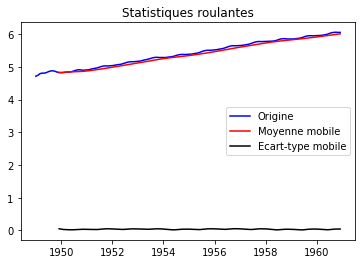

Statistiques ADF : -2.148247655427139
p-value : 0.22556144722800753
Valeurs Critiques :
	1%: -3.482087964046026
	5%: -2.8842185101614626
	10%: -2.578864381347275


In [ ]:
# Décroissance exponentielle 
rolling_mean_exp_decay = df_log.ewm(halflife=12,
                                   min_periods =0,
                                   adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(rolling_mean_exp_decay)

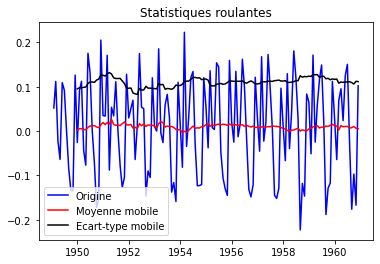

Statistiques ADF : -2.717130598388145
p-value : 0.0711205481508568
Valeurs Critiques :
	1%: -3.4825006939887997
	5%: -2.884397984161377
	10%: -2.578960197753906


In [ ]:
# Décalage temporelle 
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace= True)
get_stationarity(df_log_shift)

### ARIMA avec un modèle auto-regressif (d'ordre 2 )                                  

In [ ]:
decomposition = seasonal_decompose(df_log)
model = ARIMA(df_log, order = (2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')
 # Résoudre le problème 
    #1- mettre à jour Pandas
    #2- mettre à jour statsmodels 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

AttributeError: 'pandas._libs.properties.CachedProperty' object has no attribute 'func'

In [ ]:
fig = results.plot_predict(1,264)